# Библиотеки

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.4 MB/s eta 0:00:00


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.3/225.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.5 MB/s eta 0:00:00


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold

import optuna
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Загрузка данных

In [ ]:
df = pd.read_csv('proj.csv')
df

,Год выпуска,Пробег,Кузов,Цвет,Двигатель,Коробка,Привод,Руль,Состояние,Таможня,...,USD_price,brend,KGS_price,Внешний вид,Салон,Безопасность,Опции,Рассрочка,Мультимедиа,VIN
0,2021,27000 км,внедорожник 5 дв.,бронза,204 л.с. / 150 кВт / электро,автомат,задний,слева,идеальное,растаможен,...,32000.0,Поиск / Volkswagen / ID.6 / Volkswagen ID.6,2805120.0,\nтонировка\nлитые диски\nлюк\n,\nкожа\n,\nантиблокировочная система (ABS)\nантипробукс...,\nполный электропакет\nсигнализация\nкондицион...,NaN,NaN,NaN
1,2019,50000 км,седан,серебристый,2.5 л / ...,вариатор,передний,слева,идеальное,растаможен,...,38000.0,Поиск / Toyota / Avalon / Toyota Avalon V,3331080.0,\nобвес\nлитые диски\nлюк\n,\nкожа\n,\nантиблокировочная система (ABS)\nантипробукс...,\nполный электропакет\nсигнализация\nавтозавод...,есть,\nCD\nDVD\nMP3\nUSB\n,NaN
2,2018,200000 км,седан,серебристый,2.0 л / ...,автомат,передний,слева,хорошее,растаможен,...,12200.0,Поиск / Hyundai / Sonata / Hyundai Sonata VII ...,1069452.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,142630 км,внедорожник 5 дв.,белый,5.6 л / ...,автомат,полный,слева,идеальное,растаможен,...,31000.0,Поиск / Nissan / Patrol / Nissan Patrol VI (Y6...,2717460.0,\nтонировка\nлитые диски\n,\nкожа\n,\nантиблокировочная система (ABS)\nантипробукс...,\nсигнализация\nклимат контроль\nкруиз-контрол...,NaN,NaN,NaN
4,2012,120000 км,седан,черный,4.4 л / ...,автомат,полный,слева,хорошее,растаможен,...,18800.0,Поиск / BMW / 7 серии / BMW 7 серии V (F01/F02...,1648008.0,\nтонировка\nлитые диски\nлюк\n,\nкожа\nдерево\n,\nантиблокировочная система (ABS)\nантипробукс...,\nполный электропакет\nклимат контроль\nкруиз-...,NaN,\nMP3\nUSB\n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5475,2018,79000 км,универсал,белый,2.5 л / ...,вариатор,полный,слева,хорошее,растаможен,...,24500.0,Поиск / Subaru / Outback / Subaru Outback V Ре...,2147670.0,\nлюк\n,\nкожа\n,\nантиблокировочная система (ABS)\nантипробукс...,\nполный электропакет\nкондиционер\nклимат кон...,NaN,\nUSB\nDVD\n,NaN
5476,2017,100000 км,внедорожник 5 дв.,черный,4.6 л / ...,автомат,полный,слева,новое,растаможен,...,51900.0,Поиск / Lexus / GX / Lexus GX II Рестайлинг,4549554.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5477,2018,84000 км,внедорожник 5 дв.,белый,2.4 л / ...,автомат,полный,слева,новое,растаможен,...,20900.0,Поиск / Kia / Sportage / Kia Sportage IV,1832094.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5478,2018,48000 км,внедорожник 5 дв.,серый,2.5 л / ...,вариатор,полный,слева,новое,растаможен,...,25400.0,Поиск / Toyota / RAV4 / Toyota RAV4 IV (XA40) ...,2226564.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Год выпуска            5474 non-null   object 
 1   Пробег                 5190 non-null   object 
 2   Кузов                  5474 non-null   object 
 3   Цвет                   5474 non-null   object 
 4   Двигатель              5474 non-null   object 
 5   Коробка                5474 non-null   object 
 6   Привод                 5474 non-null   object 
 7   Руль                   5474 non-null   object 
 8   Состояние              5474 non-null   object 
 9   Таможня                5474 non-null   object 
 10  Обмен                  3044 non-null   object 
 11  Наличие                5474 non-null   object 
 12  Регион, город продажи  5474 non-null   object 
 13  Учёт                   5004 non-null   object 
 14  Прочее                 1971 non-null   object 
 15  USD_

# Чистка данных

In [ ]:
df.columns

Index(['Год выпуска', 'Пробег', 'Кузов', 'Цвет', 'Двигатель', 'Коробка',
       'Привод', 'Руль', 'Состояние', 'Таможня', 'Обмен', 'Наличие',
       'Регион, город продажи', 'Учёт', 'Прочее', 'USD_price', 'brend',
       'KGS_price', 'Внешний вид', 'Салон', 'Безопасность', 'Опции',
       'Рассрочка', 'Мультимедиа', 'VIN'],
      dtype='object')

Удаляем колонки, в которых объем заполненных данных составляет менее 70%, поскольку наличие большого числа пропущенных значений может исказить информацию и негативно повлиять на результаты при создании моделей.

In [ ]:
percent_filled = (df.count() / len(df)) * 100
columns_below_70_percent = percent_filled[percent_filled < 70].index.tolist()

print('Колонки с заполнением менее 70%:', columns_below_70_percent)

Колонки с заполнением менее 70%: ['Обмен', 'Прочее', 'Внешний вид', 'Салон', 'Безопасность', 'Опции', 'Рассрочка', 'Мультимедиа', 'VIN']


In [ ]:
df.drop(columns=['Обмен', 'Прочее', 'Внешний вид', 'Салон', 'Безопасность', 'Опции', 'Рассрочка', 'Мультимедиа', 'VIN'], inplace=True)

In [ ]:
df = df.reset_index(drop=True)

После удаления определенных колонок мы переходим к этапу очистки оставшихся данных в наборе.

**Бренды и модели**

In [ ]:
df['brend'].isnull().sum()

6

In [ ]:
df = df.dropna(subset='brend')

In [ ]:
df['brend'] = df['brend'].str.replace('Поиск / ', '')

In [ ]:
models = df['brend'].dropna().str.strip().str.split('/')

clean_model = []
for i in models:
  entry = [entry.strip() for entry in i]
  clean_model.append(entry)
models = pd.DataFrame(clean_model)

models.head(2)

,0,1,2,3,4,5
0,Volkswagen,ID.6,Volkswagen ID.6,None,None,None
1,Toyota,Avalon,Toyota Avalon V,None,None,None


In [ ]:
df['Brand'] = models[0]
df = df.dropna(subset='Brand')

In [ ]:
df['Model'] = models[1]
df = df.dropna(subset='Model')

<ipython-input-17-ac4ae78c9eca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model'] = models[1]


In [ ]:
df[['Brand', 'Model']].head()

,Brand,Model
0,Volkswagen,ID.6
1,Toyota,Avalon
2,Hyundai,Sonata
3,Nissan,Patrol
4,BMW,7 серии


In [ ]:
df = df.drop('brend', axis = 1)

**Год выпуска**

In [ ]:
df['Год выпуска'].unique()

array(['2021', '2019', '2018', '2014', '2012', '2017', '2013', '2020',
       '2022', '2016', '2005', '2010', '2004', '2008', '2009', '2011',
       '2007', '2000', '2015', '2023', '2002', '2003', '2006', '1991',
       '1992', '1998', '2001', '1999', '1996', '1987', '1994', '1997',
       '1993', '1988', '1995', '1989', '1983', '2023, новый', '1990',
       '1981', '1986', '2011, новый', '2017, новый', '2022, новый',
       '1984', '1985'], dtype=object)

In [ ]:
df['Год выпуска'] = df['Год выпуска'].str.replace(', новый', '').astype(float)

**Пробег**

In [ ]:
df['Пробег'].unique()

array(['27000 км', '50000 км', '200000 км', ..., '132048 км', '215215 км',
       '127800 км'], dtype=object)

In [ ]:
df['Пробег'] = df['Пробег'].str.replace('км', '').astype(float)

In [ ]:
df['Пробег'].isnull().sum()

284

In [ ]:
mean_km_year = df.groupby('Год выпуска')['Пробег'].mean()
mean_km_year

Год выпуска
1981.0    246000.000000
1983.0    190000.000000
1984.0    524242.000000
1985.0    300000.000000
1986.0    327951.333333
1987.0    212807.800000
1988.0    208511.666667
1989.0    249130.833333
1990.0    357197.200000
1991.0    265621.950000
1992.0    269801.625000
1993.0    270050.666667
1994.0    263695.695652
1995.0    279708.300000
1996.0    268658.458333
1997.0    267000.080000
1998.0    256340.638889
1999.0    289093.461538
2000.0    257727.758621
2001.0    251710.585859
2002.0    240663.732143
2003.0    228022.697479
2004.0    222402.834286
2005.0    214211.285714
2006.0    199143.882353
2007.0    187181.238095
2008.0    192052.293706
2009.0    177620.226415
2010.0    167771.252874
2011.0    170744.728395
2012.0    167573.108434
2013.0    151359.730769
2014.0    157591.881356
2015.0    134292.121212
2016.0    129141.063158
2017.0    120280.072359
2018.0    109772.547022
2019.0     89635.669065
2020.0     58969.296296
2021.0     33709.246667
2022.0     10678.832653
2023

In [ ]:
df['Пробег'] = df.apply(lambda i: mean_km_year[i['Год выпуска']] if pd.isna(i['Пробег']) else i['Пробег'], axis=1)

In [ ]:
df['Пробег'].isnull().sum()

0

**Тип и объем двигателя**

In [ ]:
df['Двигатель'].unique()

array(['204 л.с. / 150 кВт / электро',
       '2.5                          л /                                                                          гибрид',
       '2.0                          л /                                                                          газ',
       '5.6                          л /                                                                          бензин',
       '4.4                          л /                                                                          бензин',
       '2.5                          л /                                                                          бензин',
       '3.0                          л /                                                                          бензин',
       '4.4                          л /                                                                          дизель',
       '4.0                          л /                                                               

In [ ]:
engines = df['Двигатель'].dropna().str.strip().str.split('                          л /                                                                          ')

clean_engines = []
for engine in engines:
  entry = [entry.strip() for entry in engine]
  clean_engines.append(entry)
engines = pd.DataFrame(clean_engines)

engines.head()

,0,1
0,204 л.с. / 150 кВт / электро,None
1,2.5,гибрид
2,2.0,газ
3,5.6,бензин
4,4.4,бензин


In [ ]:
engines[1].unique()

array([None, 'гибрид', 'газ', 'бензин', 'дизель', 'бензин / газ'],
      dtype=object)

In [ ]:
engines[engines[1].isnull()]

,0,1
0,204 л.с. / 150 кВт / электро,None
72,544 л.с. / 400 кВт / электро,None
90,544 л.с. / 400 кВт / электро,None
111,544 л.с. / 400 кВт / электро,None
132,490 л.с. / 360 кВт / электро,None
...,...,...
5454,90 кВт / электро,None
5456,218 л.с. / 160 кВт / электро,None
5457,162 л.с. / 85 кВт / электро,None
5458,218 л.с. / 160 кВт / электро,None


In [ ]:
df['Тип двигателя'] = engines[1]
df['Тип двигателя'] = df['Тип двигателя'].fillna('электро')

In [ ]:
df['Объем двигателя'] = engines[0]
df['Объем двигателя'] = df['Объем двигателя'].str.replace(' / электро', '')

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.drop(columns=['Двигатель'], inplace=True)

**Кузов**

In [ ]:
df['Кузов'].value_counts()

внедорожник 5 дв.       1936
седан                   1833
хэтчбек 5 дв.            492
минивэн                  349
универсал                171
лифтбек                   69
компактвэн                66
пикап двойная кабина      26
купе                      19
внедорожник 3 дв.         12
хэтчбек 3 дв.              8
микровэн                   6
фургон                     3
родстер                    2
кабриолет                  1
внедорожник                1
Name: Кузов, dtype: int64

**Коробка**

In [ ]:
df['Коробка'].value_counts()

автомат     3662
вариатор     629
механика     568
робот        135
Name: Коробка, dtype: int64

**Цвет**

In [ ]:
df['Цвет'].value_counts()

белый          1606
черный         1126
серебристый     782
серый           651
синий           256
зеленый          95
коричневый       58
хамелеон         57
бирюзовый        52
красный          49
золотистый       47
голубой          46
вишня            40
бежевый          38
бордовый         28
оранжевый        20
фиолетовый       12
баклажан         11
жёлтый           10
бронза            6
розовый           3
сиреневый         1
Name: Цвет, dtype: int64

**Регион, город продажи**

In [ ]:
df['Регион, город продажи'].unique()

array(['Бишкек', 'Кант', 'Ош, Ошская область', 'Китай', 'Кара-Балта',
       'Таш-Кумыр, Джалал-Абадская область', 'Ат-Баши, Нарынская область',
       'Кызыл-Кия, Баткенская область', 'Ноокат, Ошская область',
       'Сокулук', 'Джалал-Абад, Джалал-Абадская область',
       'Шамалды-Сай, Джалал-Абадская область',
       'Кара-Кульджа, Ошская область',
       'Чолпон-Ата, Иссык-Кульская область', 'Грузия', 'Токмок',
       'Баткен, Баткенская область', 'Талас, Таласская область',
       'Базар-Коргон, Джалал-Абадская область', 'Узген, Ошская область',
       'Каракол, Иссык-Кульская область',
       'Теплоключенка, Иссык-Кульская область', 'Беловодское', 'Кемин',
       'Кызыл-Адыр, Таласская область', 'Маасы, Джалал-Абадская область',
       'Кара-Суу, Ошская область', 'Южная Корея',
       'Кочкор-Ата, Джалал-Абадская область', 'Лебединовка',
       'Кадамжай, Баткенская область', 'Шопоков',
       'Балыкчи, Иссык-Кульская область',
       'Токтогул, Джалал-Абадская область', 'США',


**Состояние**

In [ ]:
df['Состояние'].value_counts()

хорошее                   2775
идеальное                 1875
новое                      337
аварийное / не на ходу       7
Name: Состояние, dtype: int64

После успешной очистки мы применяем метод кодирования "Target Encoder" к соответствующим столбцам, чтобы преобразовать данные в числовой формат. Это необходимо, так как модели регрессии способны работать только с числовыми или бинарными данными в наборе данных.

In [ ]:
encoder = ce.TargetEncoder(cols=['Brand', 'Model', 'Год выпуска', 'Пробег', 'Кузов', 'Тип двигателя', 'Объем двигателя', 'Коробка',
                                 'Цвет', 'Регион, город продажи', 'Состояние'])
encoded_df = encoder.fit_transform(df[['Brand', 'Model', 'Год выпуска', 'Пробег', 'Кузов', 'Тип двигателя', 'Объем двигателя',
                                       'Коробка','Цвет', 'Регион, город продажи', 'Состояние']], df['USD_price'])
encoded_df = encoded_df.rename(columns={'Brand' : 'Brand_encoded', 'Model' : 'Model_encoded', 'Год выпуска' : 'Год выпуска_encoded',
                                        'Пробег' : 'Пробег_encoded', 'Кузов' : 'Кузов_encoded', 'Тип двигателя' : 'Тип двигателя_encoded',
                                        'Объем двигателя' : 'Объем двигателя_encoded', 'Коробка' : 'Коробка_encoded', 'Цвет' : 'Цвет_encoded',
                                        'Регион, город продажи' : 'Регион, город продажи_encoded', 'Состояние' : 'Состояние_encoded'})

df = pd.concat([df, encoded_df], axis=1)

In [ ]:
df[['Brand', 'Brand_encoded', 'Model', 'Model_encoded', 'Год выпуска', 'Год выпуска_encoded', 'Пробег', 'Пробег_encoded', 'Кузов', 'Кузов_encoded',
    'Тип двигателя', 'Тип двигателя_encoded', 'Объем двигателя', 'Объем двигателя_encoded', 'Коробка', 'Коробка_encoded', 'Цвет', 'Цвет_encoded',
    'Регион, город продажи', 'Регион, город продажи_encoded', 'Состояние', 'Состояние_encoded']].head()

,Brand,Brand_encoded,Model,Model_encoded,Год выпуска,Год выпуска_encoded,Пробег,Пробег_encoded,Кузов,Кузов_encoded,...,Объем двигателя,Объем двигателя_encoded,Коробка,Коробка_encoded,Цвет,Цвет_encoded,"Регион, город продажи","Регион, город продажи_encoded",Состояние,Состояние_encoded
0,Volkswagen,25766.463345,ID.6,25025.003073,2021.0,45556.440141,27000.0,28089.357026,внедорожник 5 дв.,38232.178719,...,204 л.с. / 150 кВт,25265.754084,автомат,29045.013927,бронза,27114.101547,Бишкек,26896.048862,идеальное,29969.287467
1,Toyota,25252.984955,Avalon,24299.973749,2019.0,29929.646310,50000.0,29575.333549,седан,18951.023459,...,2.5,25015.207792,вариатор,22541.761526,серебристый,15791.578005,Бишкек,26896.048862,идеальное,29969.287467
2,Hyundai,26321.322242,Sonata,20163.000833,2018.0,26544.960000,200000.0,13316.818853,седан,18951.023459,...,2.0,25939.960163,автомат,29045.013927,серебристый,15791.578005,Бишкек,26896.048862,хорошее,19360.441441
3,Nissan,20192.884060,Patrol,23224.331372,2014.0,25156.630619,142630.0,26342.789591,внедорожник 5 дв.,38232.178719,...,5.6,26473.836733,автомат,29045.013927,белый,29987.069116,Бишкек,26896.048862,идеальное,29969.287467
4,BMW,26731.060976,7 серии,27496.505905,2012.0,19958.290621,120000.0,19753.185144,седан,18951.023459,...,4.4,32935.444888,автомат,29045.013927,черный,31874.936057,Бишкек,26896.048862,хорошее,19360.441441


Для обработки информации в столбцах 'Руль' и 'Привод' мы выбрали метод кодирования "OneHot Encoder". Этот подход оказался предпочтительным, так как он эффективно справляется с небольшим набором уникальных значений в данных колонках. Например, в столбце 'Руль' всего два варианта: 'правый' и 'левый', а в столбце 'Привод' - три варианта. Применение "OneHot Encoder" позволяет создать новые бинарные столбцы для каждого уникального значения из исходных данных. Этот подход незначительно увеличивает размерность датасета, однако точно отображает информацию о типе рулевого расположения и привода для каждой записи.

**Руль**

In [ ]:
df['Руль'].value_counts()

слева     4583
справа     411
Name: Руль, dtype: int64

In [ ]:
encoded_df = pd.get_dummies(df['Руль'])
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
new_column_names = {
    'слева': 'Руль слева',
    'справа': 'Руль справа'
}

df.rename(columns=new_column_names, inplace=True)

**Привод**

In [ ]:
df['Привод'].value_counts()

передний    2691
полный      1860
задний       443
Name: Привод, dtype: int64

In [ ]:
encoded_df = pd.get_dummies(df['Привод'])
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
new_column_names = {
    'передний': 'Привод передний',
    'полный': 'Привод полный',
    'задний': 'Привод задний'
}

df.rename(columns=new_column_names, inplace=True)

Мы решили не вносить изменения в структуру колонок 'Таможня', 'Наличие' и 'Учёт' так как нет необходимости использовать данные из этих колонок в будущем.




**Таможня**

In [ ]:
df['Таможня'].value_counts()

растаможен       4085
не растаможен     909
Name: Таможня, dtype: int64

**Наличие**

In [ ]:
df['Наличие'].value_counts()

в наличии    3794
на заказ     1070
в пути        130
Name: Наличие, dtype: int64

**Учёт**

In [ ]:
df['Учёт'].value_counts()

Кыргызстан           3167
Не стоит на учёте    1541
Другая страна         131
Россия                 91
Армения                59
Абхазия                 3
Казахстан               2
Name: Учёт, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4994 entries, 0 to 5467
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Год выпуска                    4994 non-null   float64
 1   Пробег                         4994 non-null   float64
 2   Кузов                          4994 non-null   object 
 3   Цвет                           4994 non-null   object 
 4   Коробка                        4994 non-null   object 
 5   Привод                         4994 non-null   object 
 6   Руль                           4994 non-null   object 
 7   Состояние                      4994 non-null   object 
 8   Таможня                        4994 non-null   object 
 9   Наличие                        4994 non-null   object 
 10  Регион, город продажи          4994 non-null   object 
 11  Учёт                           4994 non-null   object 
 12  USD_price                      4994 non-null   f


В результате всех проведенных этапов по очистке данных и применению методов кодирования, исходный набор данных был преобразован. Теперь он включает 32 колонки и 4994 строки. Все эти колонки были объединены в основном датасете, и порядок колонок был изменен с тем, чтобы наглядно отобразить исходные данные и данные после применения метода Target Encoding.

In [ ]:
df = df[['Brand', 'Brand_encoded', 'Model', 'Model_encoded', 'Год выпуска', 'Год выпуска_encoded', 'Пробег','Пробег_encoded', 'Тип двигателя', 'Тип двигателя_encoded',
         'Объем двигателя', 'Объем двигателя_encoded', 'Кузов', 'Кузов_encoded', 'Цвет', 'Цвет_encoded', 'Коробка','Коробка_encoded', 'Руль',
         'Руль слева', 'Руль справа', 'Привод', 'Привод задний', 'Привод передний', 'Привод полный', 'Регион, город продажи', 'Регион, город продажи_encoded',
         'USD_price', 'KGS_price', 'Состояние', 'Состояние_encoded', 'Таможня', 'Наличие']]

df.head()

,Brand,Brand_encoded,Model,Model_encoded,Год выпуска,Год выпуска_encoded,Пробег,Пробег_encoded,Тип двигателя,Тип двигателя_encoded,...,Привод передний,Привод полный,"Регион, город продажи","Регион, город продажи_encoded",USD_price,KGS_price,Состояние,Состояние_encoded,Таможня,Наличие
0,Volkswagen,25766.463345,ID.6,25025.003073,2021.0,45556.440141,27000.0,28089.357026,электро,28923.450124,...,0,0,Бишкек,26896.048862,32000.0,2805120.0,идеальное,29969.287467,растаможен,в наличии
1,Toyota,25252.984955,Avalon,24299.973749,2019.0,29929.646310,50000.0,29575.333549,гибрид,26170.144958,...,1,0,Бишкек,26896.048862,38000.0,3331080.0,идеальное,29969.287467,растаможен,в наличии
2,Hyundai,26321.322242,Sonata,20163.000833,2018.0,26544.960000,200000.0,13316.818853,газ,26513.552227,...,1,0,Бишкек,26896.048862,12200.0,1069452.0,хорошее,19360.441441,растаможен,в наличии
3,Nissan,20192.884060,Patrol,23224.331372,2014.0,25156.630619,142630.0,26342.789591,бензин,24416.755213,...,0,1,Бишкек,26896.048862,31000.0,2717460.0,идеальное,29969.287467,растаможен,в наличии
4,BMW,26731.060976,7 серии,27496.505905,2012.0,19958.290621,120000.0,19753.185144,бензин,24416.755213,...,0,1,Бишкек,26896.048862,18800.0,1648008.0,хорошее,19360.441441,растаможен,в наличии


# Визуализация и удаление выбросов (аутлаеров)

**Цена**

1. Распределение цен на автомобили в разных категориях.

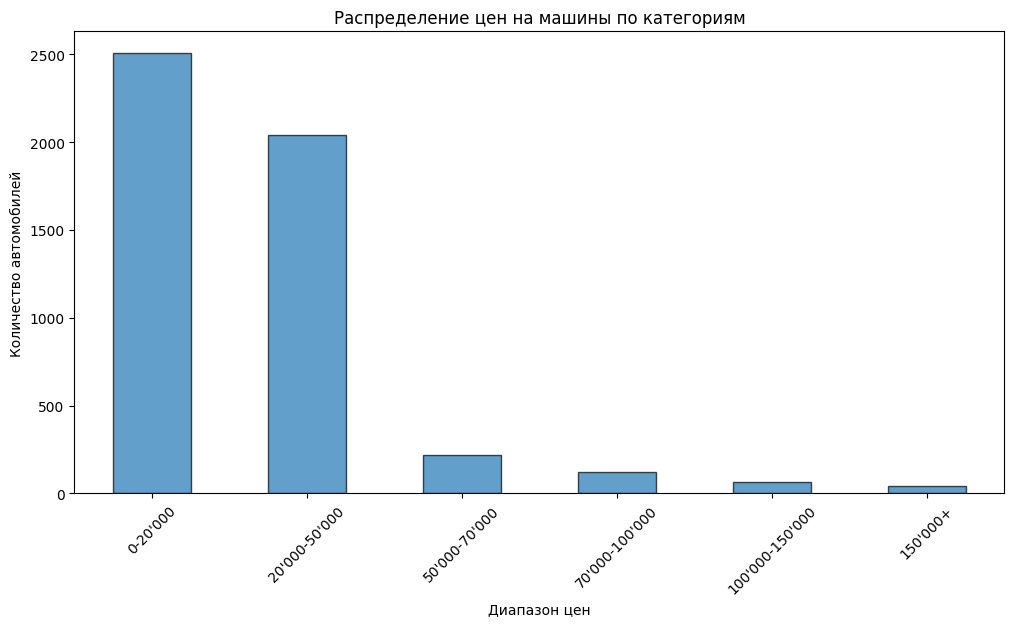

In [ ]:
price_bins = [0, 20000, 50000, 70000, 100000, 150000, float('inf')]
price_labels = ["0-20'000", "20'000-50'000", "50'000-70'000", "70'000-100'000", "100'000-150'000", "150'000+"]

df['Price Category'] = pd.cut(df['USD_price'], bins=price_bins, labels=price_labels)

plt.figure(figsize=(12, 6))
df['Price Category'].value_counts().plot(kind='bar', edgecolor='black', alpha=0.7)
plt.xlabel('Диапазон цен')
plt.ylabel('Количество автомобилей')
plt.title('Распределение цен на машины по категориям')
plt.xticks(rotation=45)
plt.show()

В данной таблице представлено разделение цен на автомобили по категориям с указанием количества автомобилей в каждом ценовом сегменте. Наиболее распространенными являются автомобили с ценой до 20 тысяч долларов — их количество на рынке значительно превышает количество автомобилей в более высоких ценовых диапазонах, особенно в случае автомобилей, стоимость которых превышает 150 тысяч долларов, количество которых ограничено.

2. Распределение цен на автомобили в датасете.

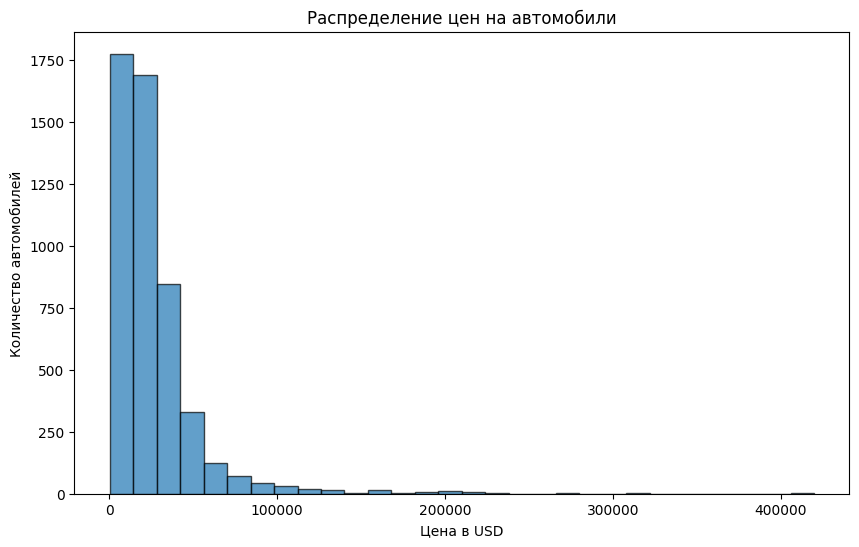

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['USD_price'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Цена в USD')
plt.ylabel('Количество автомобилей')
plt.title('Распределение цен на автомобили')
plt.show()

**Бренд**

3. Оценивание доли популярных брендов и их сравнение в общем объеме автомобилей.

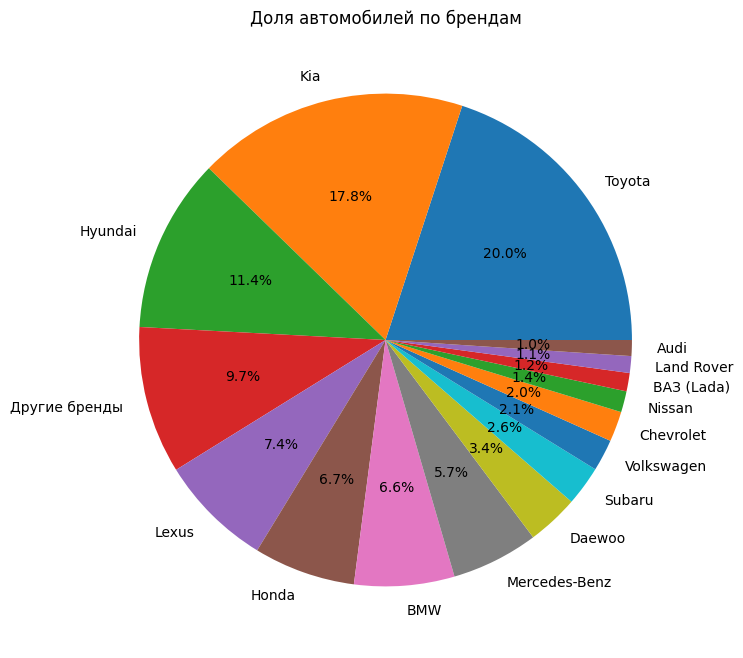

In [ ]:
brand_counts = df['Brand'].value_counts()
threshold = 50
popular_brands = brand_counts[brand_counts >= threshold].index.tolist()

df['Brand_New'] = df['Brand'].apply(lambda x: x if x in popular_brands else 'Другие бренды')
brand_counts_new = df['Brand_New'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(brand_counts_new, labels=brand_counts_new.index, autopct='%1.1f%%')
plt.ylabel('')
plt.title('Доля автомобилей по брендам')
plt.show()

Для визуализации доли каждого бренда на рынке Кыргызстана используется круговая диаграмма (Pie plot). В настоящее время наиболее популярным брендом среди автомобилей на рынке Кыргызстана является японский производитель Toyota. Также в недавнее время на рынке заметно увеличилась доля автомобилей корейских брендов KIA и Hyundai, которые заняли тройку лидеров по количеству автомобилей на рынке.

4. Соотношение бренда авто и цены.

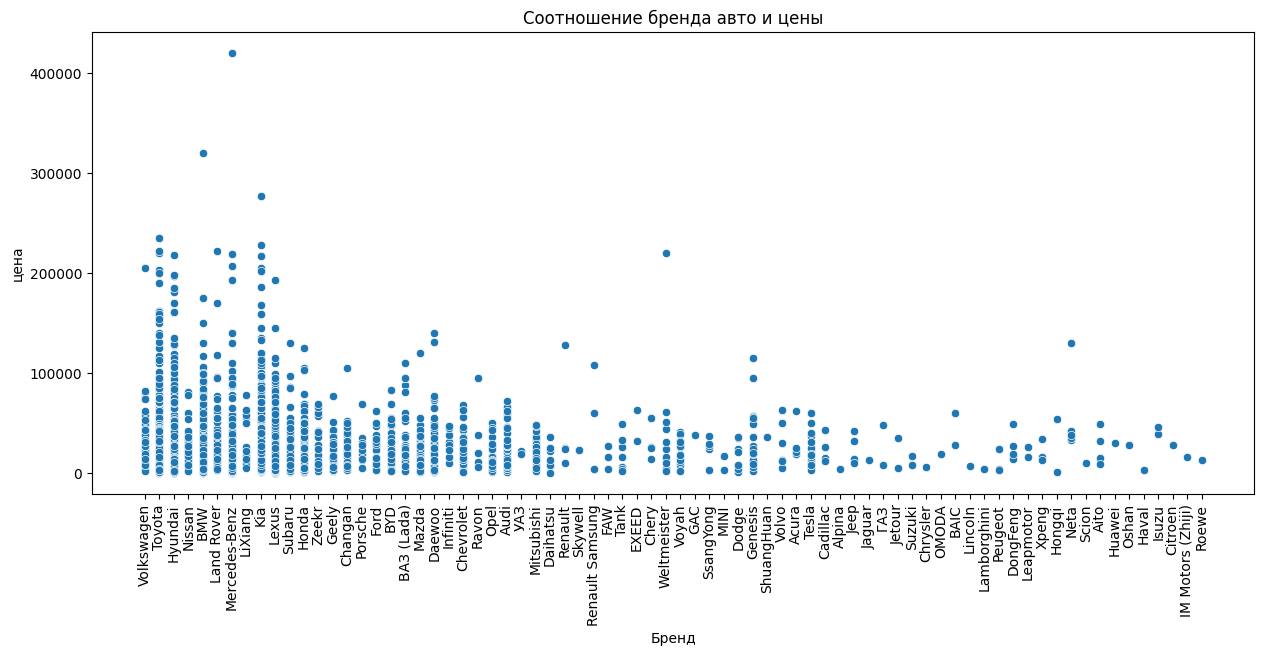

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Brand', y='USD_price', data=df)
plt.xlabel('Бренд')
plt.ylabel('цена')
plt.title('Соотношение бренда авто и цены')
plt.xticks(rotation=90)
plt.show()

На данной диаграмме отражено распределение цен на автомобили в зависимости от их бренда. График позволяет нам анализировать, как цены варьируются внутри разных производителей автомобилей. Здесь можно заметить некоторые выбросы в ценовых диапазонах у определенных брендов, что может свидетельствовать о наличии автомобилей с аномально высокой или низкой стоимостью в рамках конкретного бренда.

**Год выпуска**

5. Распределение количества автомобилей по годам.

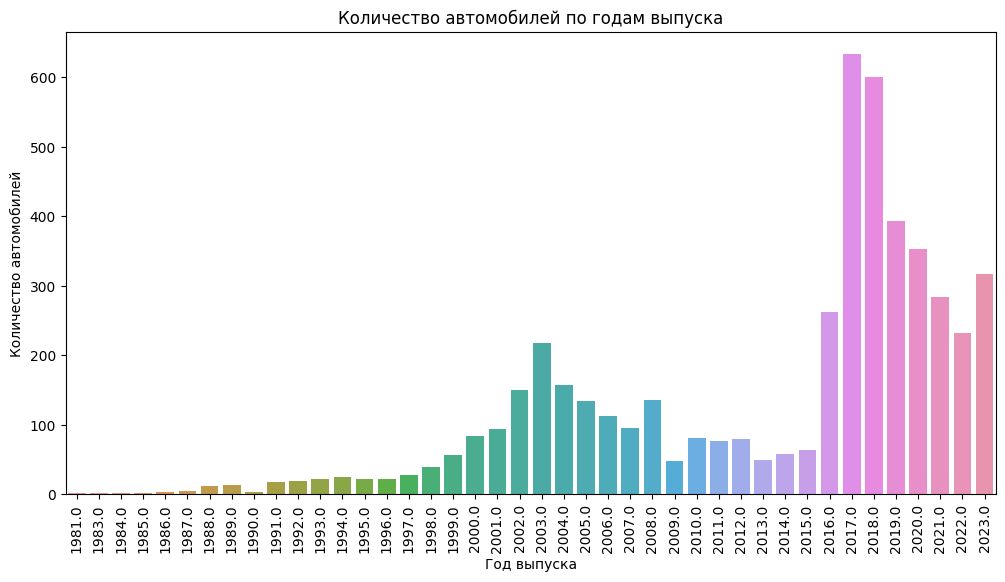

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Год выпуска', data=df)
plt.xticks(rotation=90)
plt.xlabel('Год выпуска')
plt.ylabel('Количество автомобилей')
plt.title('Количество автомобилей по годам выпуска')
plt.show()

Данный график демонстрирует соотношение количества автомобилей и их года выпуска. Он позволяет увидеть, что вследствие внесенных изменений в закон о таможенной регистрации, в нашей стране наблюдается тенденция к импорту автомобилей, произведенных не ранее 2017 года. Этот тренд объясняется стремлением обновить автопарк в республике с целью повышения безопасности дорожного движения и обеспечения безопасности как водителей, так и пешеходов.

6. Изменение количества автомобилей по годам выпуска с использованием lineplot.

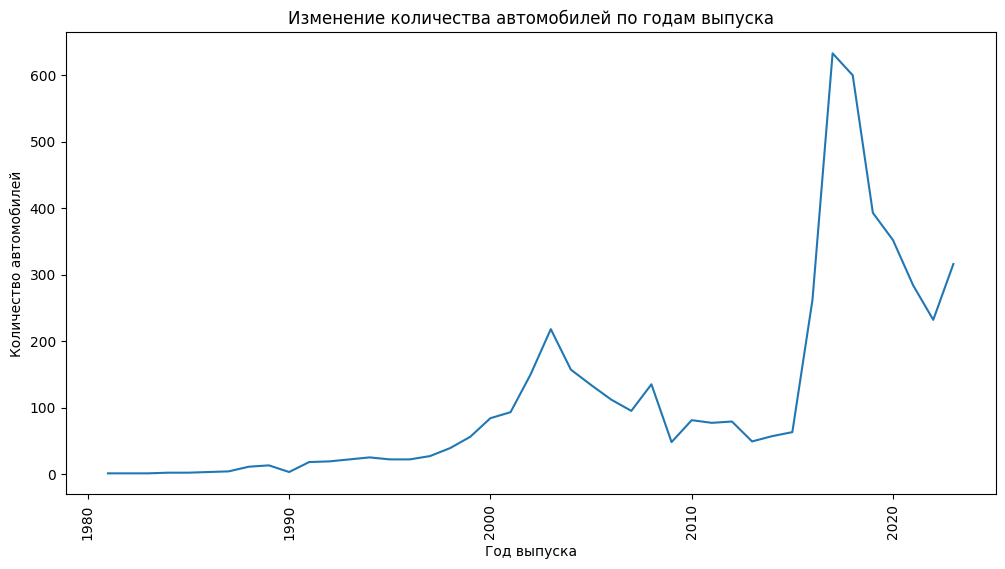

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Год выпуска', y='Количество', data=df.groupby('Год выпуска').size().reset_index(name='Количество'))
plt.xlabel('Год выпуска')
plt.ylabel('Количество автомобилей')
plt.title('Изменение количества автомобилей по годам выпуска')
plt.xticks(rotation=90)
plt.show()

Представленный график наглядно демонстрирует два заметных скачка в завозе автомобилей с 1990 года и до настоящего времени, учитывая год их выпуска. Первый значительный скачок можно интерпретировать как результат предпочтения автомобилей с правым рулем, которые доминировали на рынке до 2008 года. Второй выраженный скачок свидетельствует о заметном увеличении импорта автомобилей с годом выпуска свыше 2015 года, что, возможно, связано с обновлением автопарка и стремлением к более современным и безопасным автомобилям.

7. Изменение цен на автомобили по годам выпуска с использованием Scatter Plot с всплывающими подсказками.

In [ ]:
fig = px.scatter(df, x='Год выпуска', y='USD_price', hover_name='Brand', hover_data=['Model', 'Год выпуска', 'USD_price', df.index])

fig.update_layout(
    xaxis_title='Год выпуска',
    yaxis_title='Цена',
    title='Изменение цен на автомобили по годам выпуска'
)
fig.show()

Представленная диаграмма создана с целью выявления аномалий взаимосвязи между несколькими переменными. На графике наблюдаются выбросы, которые в дальнейшем планируется исключить. Это важно для обеспечения корректности прогнозирования цен, так как аномальные данные могут исказить результаты анализа.

Удаление выбросов (аутлаеров).

In [ ]:
top_6_max_values = df.nlargest(6, 'USD_price')
top_6_max_prices_filtered = top_6_max_values[['Brand', 'Model', 'Год выпуска', 'USD_price', 'KGS_price']]

df = df.drop(index=top_6_max_values.index).drop(925)

8. Изменение цен на автомобили по годам выпуска с использованием Scatter Plot с всплывающими подсказками после удаления выбросов.

In [ ]:
fig = px.scatter(df, x='Год выпуска', y='USD_price', hover_name='Brand', hover_data=['Model', 'Год выпуска', 'USD_price', df.index])

fig.update_layout(
    xaxis_title='Год выпуска',
    yaxis_title='Цена',
    title='Изменение цен на автомобили по годам выпуска'
)
fig.show()

После удаления выбросов график стал более плавным и сглаженным. Это важное улучшение, которое способствует более точному и надежному восприятию данных.

9. Распределение данных в колонке 'Год выпуска'.


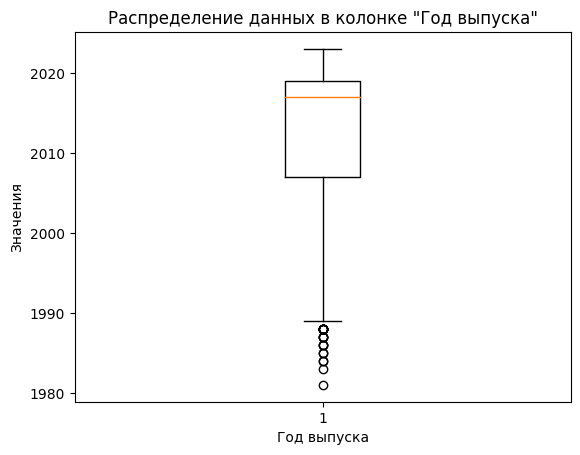

In [ ]:
plt.boxplot(df['Год выпуска'])

plt.xlabel('Год выпуска')
plt.ylabel('Значения')
plt.title('Распределение данных в колонке "Год выпуска"')
plt.show()

Было принято решение создать отдельный график ящика с усами (Boxplot) для выявления выбросов в отношении года выпуска автомобилей. В результате анализа мы приняли решение исключить автомобили, выпущенные до 1990 года, так как обнаружено, что некоторые бренды автомобилей не совпадают с их годом выпуска. Например, модель Lexus RX начала выпускаться только после 1990 года. Это позволит исключить ошибочные данные и обеспечить более точный анализ и моделирование на основе корректных данных о годе выпуска автомобилей.

In [ ]:
df[df['Год выпуска'] < 1990]

,Brand,Brand_encoded,Model,Model_encoded,Год выпуска,Год выпуска_encoded,Пробег,Пробег_encoded,Тип двигателя,Тип двигателя_encoded,...,"Регион, город продажи","Регион, город продажи_encoded",USD_price,KGS_price,Состояние,Состояние_encoded,Таможня,Наличие,Price Category,Brand_New
222,Mercedes-Benz,27095.571930,S-класс,22660.591042,1987.0,21745.353533,320000.000000,16967.619074,бензин,24416.755213,...,"Джалал-Абад, Джалал-Абадская область",6230.915773,2396.0,210000.0,хорошее,19360.441441,растаможен,в наличии,0-20'000,Mercedes-Benz
359,Mazda,21278.493420,626,24445.924866,1988.0,18930.092290,333000.000000,22283.323075,бензин,24416.755213,...,Токмок,19486.022757,1939.0,170000.0,хорошее,19360.441441,растаможен,в наличии,0-20'000,Другие бренды
360,Honda,20939.654655,Fit,19612.708444,1988.0,18930.092290,333000.000000,22283.323075,бензин,24416.755213,...,Токмок,19486.022757,1939.0,170000.0,хорошее,19360.441441,растаможен,в наличии,0-20'000,Honda
409,Toyota,25252.984955,Camry,24678.357576,1989.0,17998.894146,260000.000000,20334.418322,бензин,24416.755213,...,"Кызыл-Адыр, Таласская область",22281.691787,1255.0,110000.0,хорошее,19360.441441,растаможен,в наличии,0-20'000,Toyota
616,Toyota,25252.984955,Camry,24678.357576,1983.0,22699.752309,190000.000000,17003.260594,бензин,24416.755213,...,"Ош, Ошская область",11234.440000,3000.0,262980.0,идеальное,29969.287467,растаможен,в наличии,0-20'000,Toyota
725,Hyundai,26321.322242,Sonata,20163.000833,1981.0,22435.632106,246000.000000,22663.118813,газ,26513.552227,...,"Базар-Коргон, Джалал-Абадская область",12916.689033,970.0,85000.0,хорошее,19360.441441,растаможен,в наличии,0-20'000,Hyundai
773,BMW,26731.060976,X5,25131.350336,1989.0,17998.894146,214532.000000,22639.369248,бензин,24416.755213,...,"Джалал-Абад, Джалал-Абадская область",6230.915773,2053.0,180000.0,хорошее,19360.441441,растаможен,в наличии,0-20'000,BMW
1002,Honda,20939.654655,Jazz,19067.718566,1986.0,21963.783101,327951.333333,22680.496254,бензин,24416.755213,...,"Узген, Ошская область",17001.124680,2852.0,250000.0,хорошее,19360.441441,растаможен,в наличии,0-20'000,Honda
1662,BMW,26731.060976,X5,25131.350336,1988.0,18930.092290,300000.000000,7289.878536,дизель,28528.195519,...,Токмок,19486.022757,1369.0,120000.0,хорошее,19360.441441,растаможен,в наличии,0-20'000,BMW
1925,BMW,26731.060976,X5,25131.350336,1987.0,21745.353533,178000.000000,21975.659560,дизель,28528.195519,...,Бишкек,26896.048862,2624.0,230000.0,хорошее,19360.441441,растаможен,в наличии,0-20'000,BMW


In [ ]:
df = df[df['Год выпуска'] >= 1990]

10. Распределение данных в колонке "Год выпуска" после удаления выбросов.

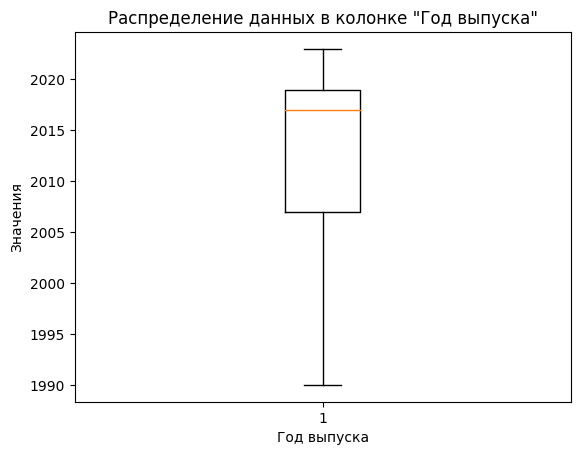

In [ ]:
plt.boxplot(df['Год выпуска'])

plt.xlabel('Год выпуска')
plt.ylabel('Значения')
plt.title('Распределение данных в колонке "Год выпуска"')
plt.show()

На графике видно, что после удаления аномальных данных по году выпуска выбросы были успешно устранены.

**Пробег**

11. Распределение количества автомобилей по пробегу.

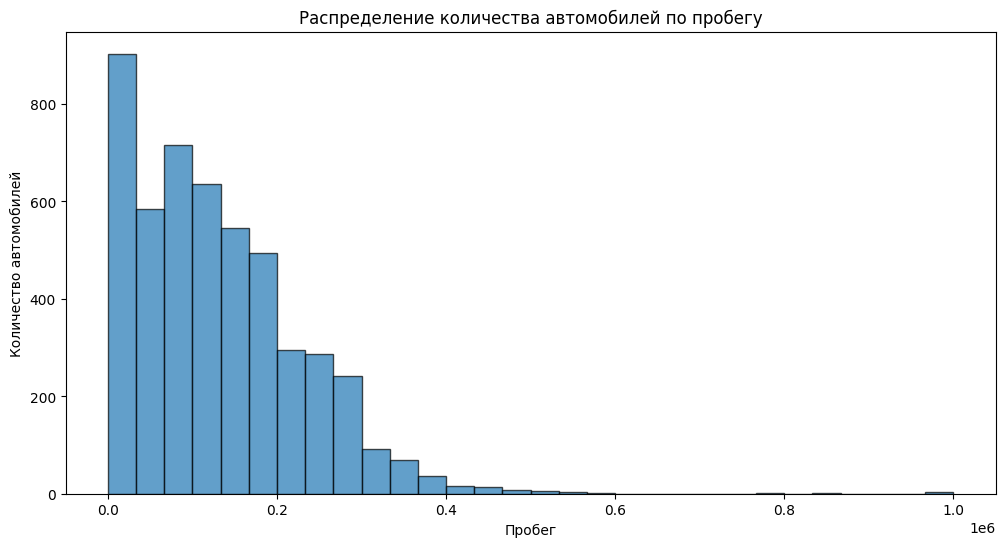

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['Пробег'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Пробег')
plt.ylabel('Количество автомобилей')
plt.title('Распределение количества автомобилей по пробегу')
plt.show()

На гистограмме представлено распределение количества автомобилей в зависимости от пробега. Ось X показывает интервалы пробега в километрах (км), где "1е6" означает диапазон от 0 до 200 000 км. Ось Y показывает количество автомобилей в каждом интервале. Гистограмма наглядно демонстрирует, как количество автомобилей меняется в зависимости от диапазона пробега, с высоким числом автомобилей в диапазоне до 200 000 км и снижением после этого значения.

12. Распределение пробега по годам выпуска.

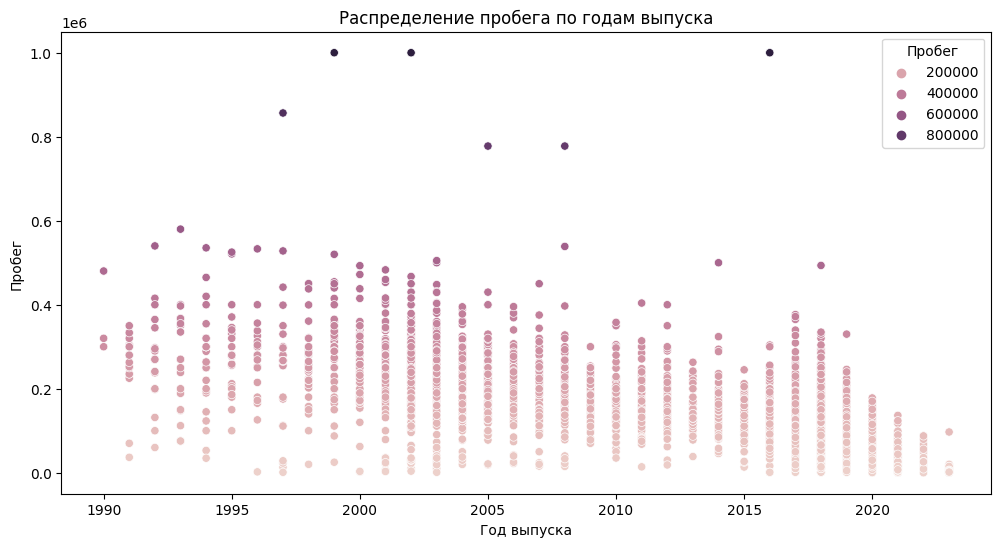

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Год выпуска', y='Пробег', hue = 'Пробег', data=df)
plt.xlabel('Год выпуска')
plt.ylabel('Пробег')
plt.title('Распределение пробега по годам выпуска')
plt.show()

Можно заметить, что на этой диаграмме также присутствуют выбросы. Планируется удаление данных выбросов, что позволит провести более точный анализ зависимости.





Удаление выбросов.

In [ ]:
top_6_max_values = df.nlargest(6, 'Пробег')
df = df.drop(index=top_6_max_values.index)

13. Распределение пробега по годам выпуска после удаления выбросов.

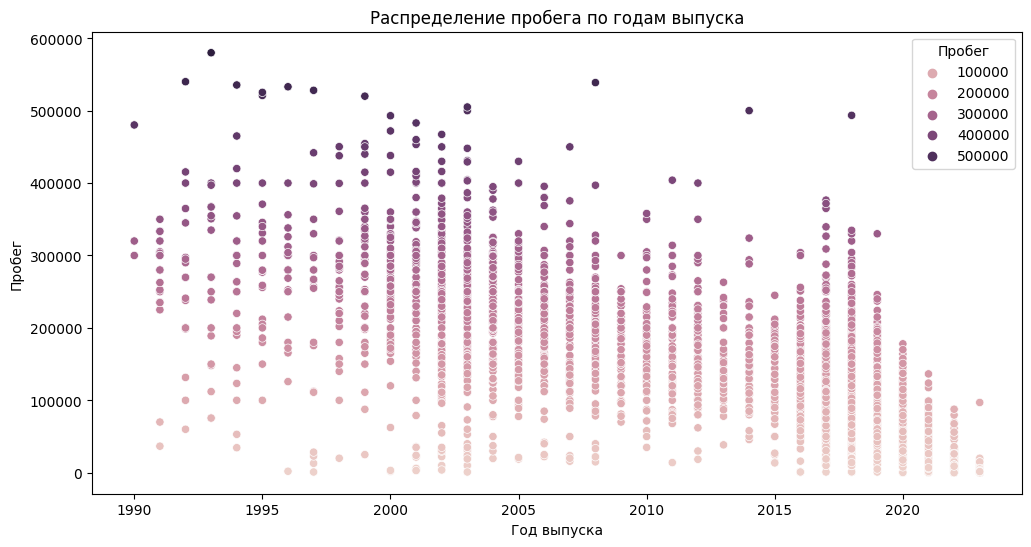

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Год выпуска', y='Пробег', hue = 'Пробег', data=df)
plt.xlabel('Год выпуска')
plt.ylabel('Пробег')
plt.title('Распределение пробега по годам выпуска')
plt.show()

 Представлена диаграмма после удаления выбросов. При таком подходе, мы сможем более точно оценить взаимосвязь между годом выпуска и пробегом автомобилей, исключив значения, которые могли бы исказить общую картину.


14. Изменение среднего пробега по годам выпуска.

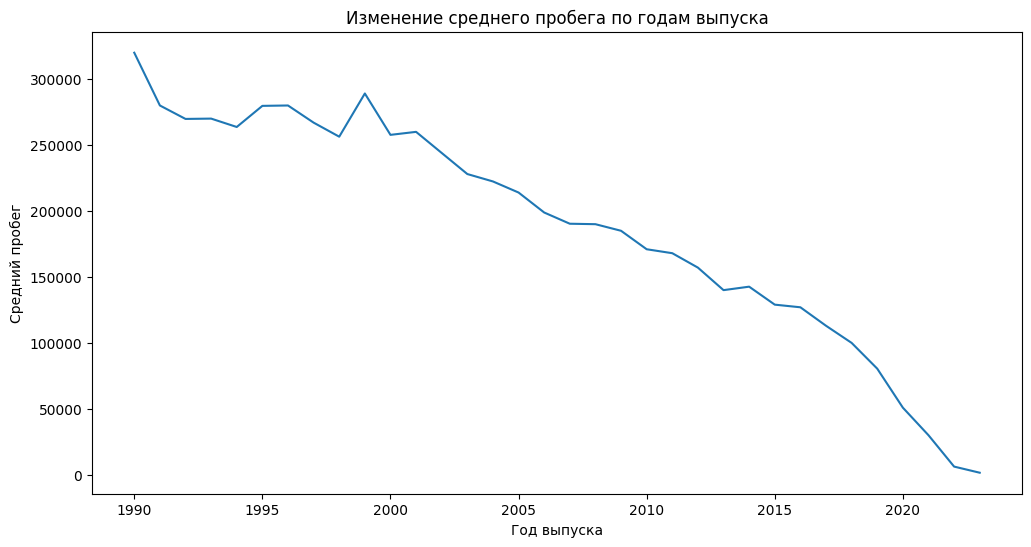

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Год выпуска', y='Пробег', data=df.groupby('Год выпуска')['Пробег'].median().reset_index())
plt.xlabel('Год выпуска')
plt.ylabel('Средний пробег')
plt.title('Изменение среднего пробега по годам выпуска')
plt.show()

Представленный линейный график демонстрирует взаимосвязь между средним пробегом и годом выпуска автомобилей. Очевидно, что с возрастом автомобиля его средний пробег увеличивается.

**Тип двигателя**

15. Распределение числа автомобилей по типу двигателя.

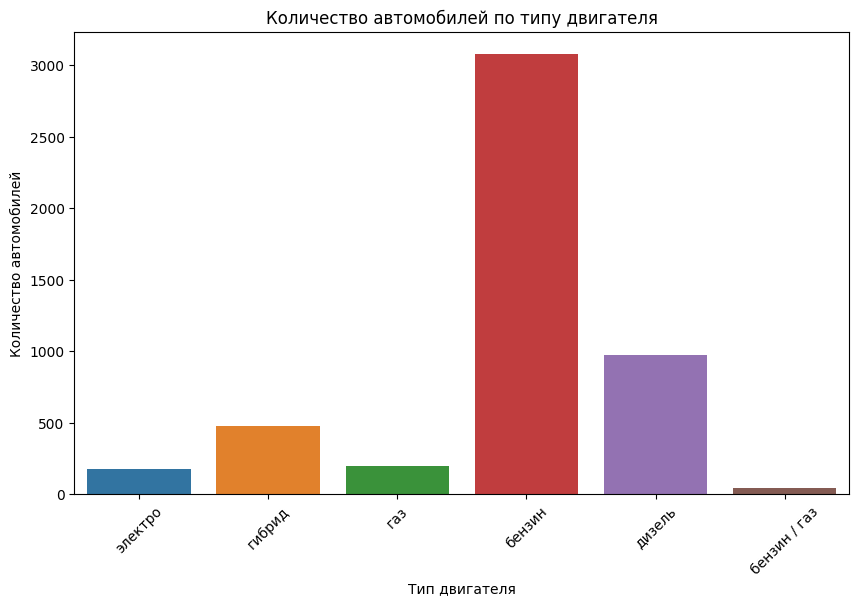

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Тип двигателя', data=df)
plt.xlabel('Тип двигателя')
plt.ylabel('Количество автомобилей')
plt.title('Количество автомобилей по типу двигателя')
plt.xticks(rotation=45)
plt.show()

Данный график иллюстрирует взаимосвязь между типом двигателя и количеством автомобилей. Большинство автомобилей оснащено бензиновыми двигателями, что представлено значительно большей долей в сравнении с другими типами двигателей.

16. Распределение цен на автомобили по типам двигателей.

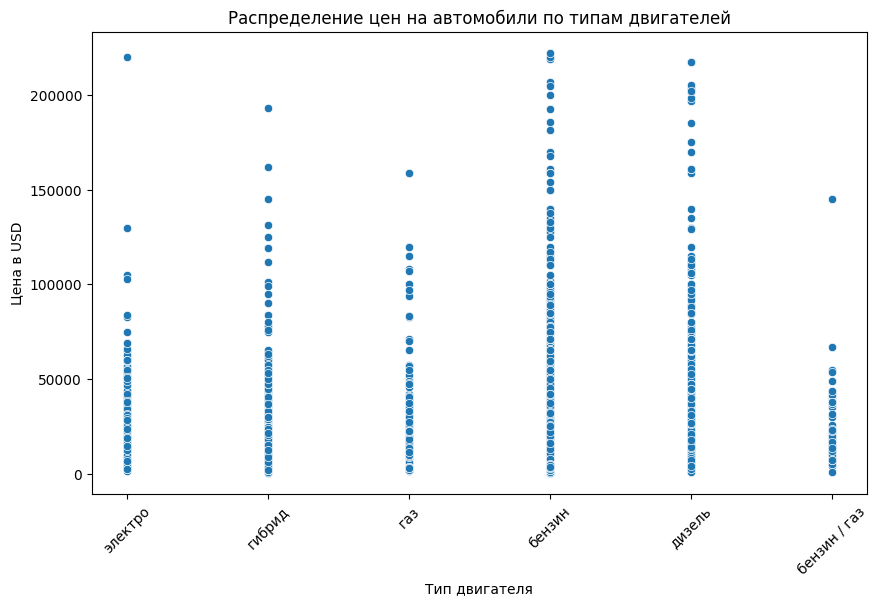

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Тип двигателя', y='USD_price', data=df)
plt.xlabel('Тип двигателя')
plt.ylabel('Цена в USD')
plt.title('Распределение цен на автомобили по типам двигателей')
plt.xticks(rotation=45)
plt.show()

Точечная диаграмма распределения цен на автомобили по типам двигателей. Бензин, дизель и гибрид представлены в широком диапазоне ценовых категорий, что говорит о возможности приобретения автомобилей с этими типами двигателей как в более доступных, так и в более дорогих ценовых сегментах. Другие типы двигателей преобладают в минимальной и средней ценовых категориях. Это наблюдение позволяет сделать вывод о гибкости ценовой политики для определенных типов двигателей и более узкой спецификации для остальных.

**Цвет**

17. Изменения числа автомобилей по цветам.

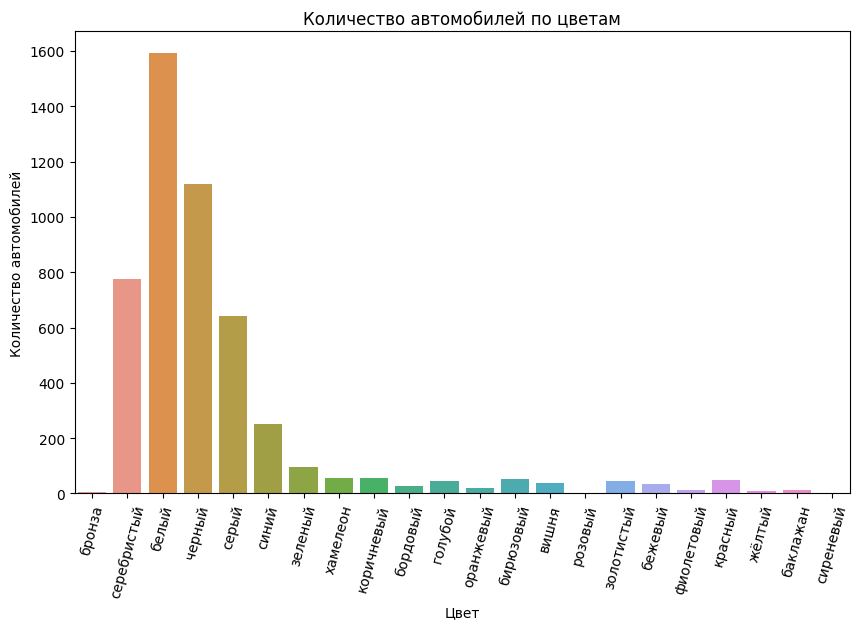

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Цвет', data=df)
plt.xlabel('Цвет')
plt.ylabel('Количество автомобилей')
plt.title('Количество автомобилей по цветам')
plt.xticks(rotation=75)
plt.show()

Мы провели анализ предпочтений жителей Кыргызстана в цветовой гамме автомобилей, которую они чаще всего выбирают при покупке.

18. Распределение цен на автомобили в зависимости от их цвета.

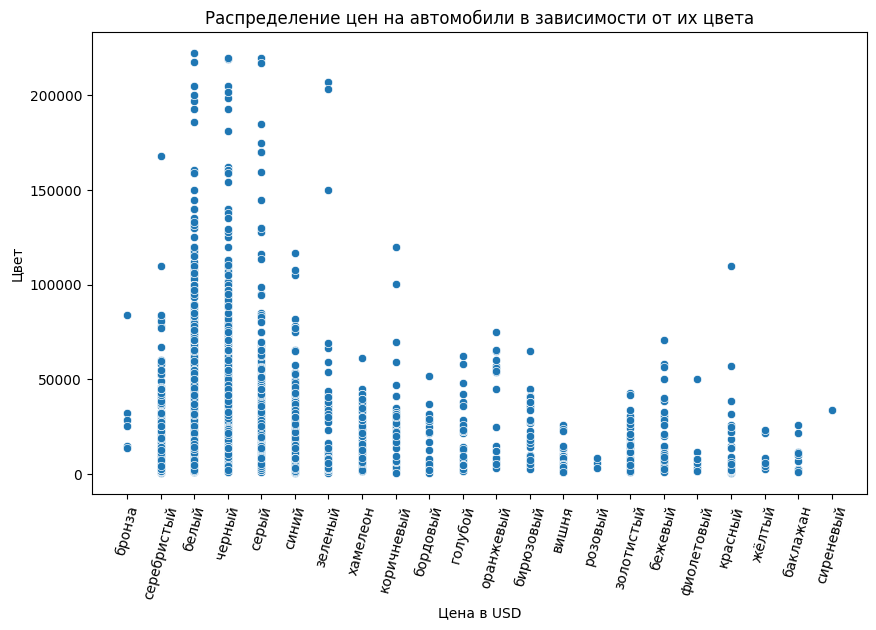

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Цвет', y='USD_price', data=df)
plt.xlabel('Цена в USD')
plt.ylabel('Цвет')
plt.xticks(rotation=75)
plt.title('Распределение цен на автомобили в зависимости от их цвета')
plt.show()

Также проведен анализ зависимости между ценой автомобиля и его цветом. По результатам анализа стало явно видно, что некоторые цвета автомобилей выделяются как самые дорогие и в то же время наиболее популярные среди потребителей. В частности, белые, черные и серые автомобили.

**Кузов**

19. Распределение числа автомобилей по типам кузова.

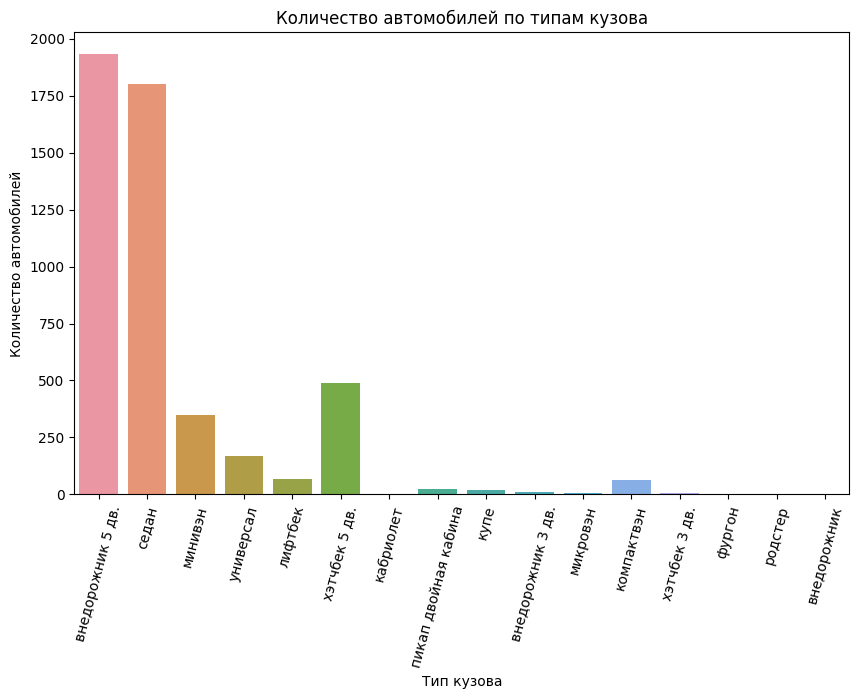

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Кузов', data=df)
plt.xlabel('Тип кузова')
plt.ylabel('Количество автомобилей')
plt.title('Количество автомобилей по типам кузова')
plt.xticks(rotation=75)
plt.show()

На данной диаграмме наглядно представлено распределение количества автомобилей среди различных типов кузова. Визуализация позволяет определить, какие типы кузова наиболее предпочтительны среди жителей Кыргызстана. В нашем датасете особенно выделяются два типа кузова: внедорожники 5 дв. и седаны.

**Состояние**

20. Доля состояния автомобилей.

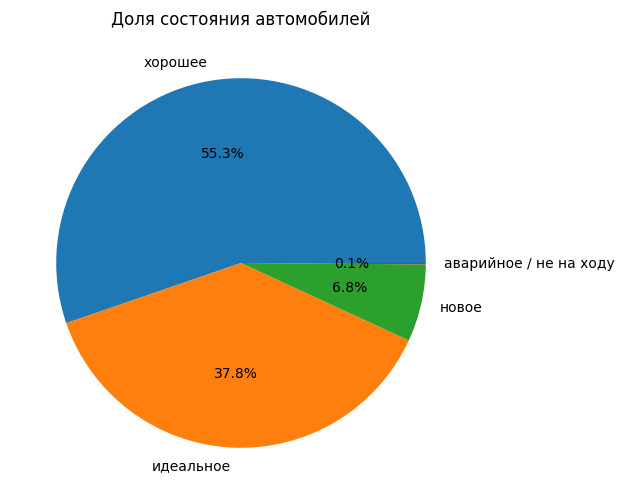

In [ ]:
plt.figure(figsize=(6, 6))
df['Состояние'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Доля состояния автомобилей')
plt.show()

На данной круговой диаграмме наглядно представлена доля состояния автомобилей в нашем наборе данных. Заметно, что автомобили в хорошем состоянии составляют более половины всех представленных данных.

21. Зависимость цены от состояния автомобиля.

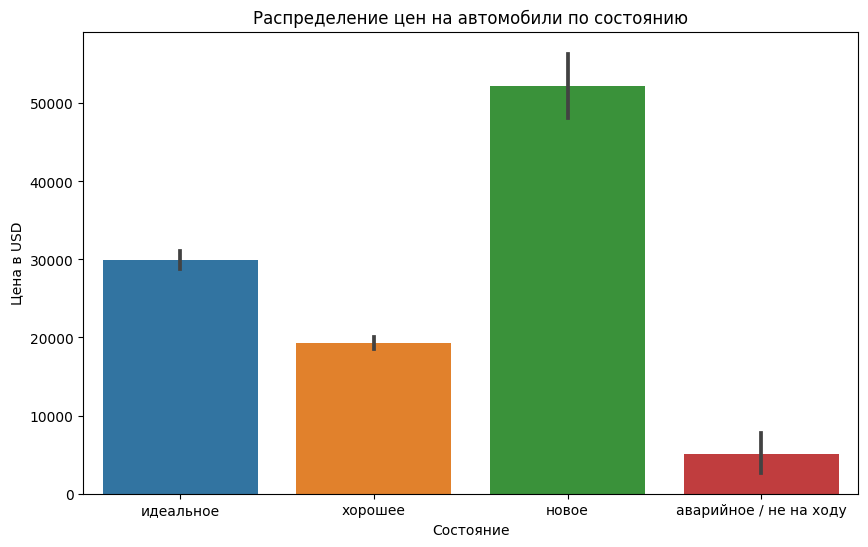

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Состояние', y='USD_price', data=df)
plt.xlabel('Состояние')
plt.ylabel('Цена в USD')
plt.title('Распределение цен на автомобили по состоянию')
plt.show()

Мы провели анализ влияния состояния автомобиля на его цену, разделяя состояния на несколько категорий. Из графика видно, что существует выраженная зависимость между состоянием автомобиля и его ценой. Новые автомобили оказались самыми дорогими, что вполне логично, ведь они несут наименьший износ. За ними следуют "идеальные", которые также пользуются высоким спросом, а следом идут автомобили в хорошем состоянии. Состояние автомобиля после аварии оказалось наименее ценным, что объясняется не только видимыми повреждениями, но и потенциальными проблемами, которые могут возникнуть в будущем.

**Руль**

22. Количество автомобилей по расположению руля.

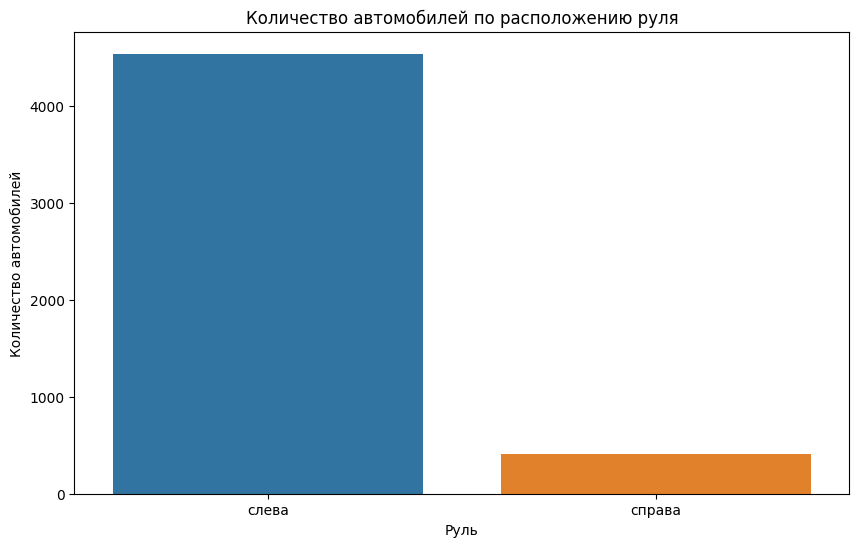

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Руль', data=df)
plt.xlabel('Руль')
plt.ylabel('Количество автомобилей')
plt.title('Количество автомобилей по расположению руля')
plt.xticks(rotation=0)
plt.show()

На данном графике представлено количество автомобилей от типа расположения руля на рынке Кыргызстана. Заметно, что доля автомобилей с правым расположением руля постепенно уменьшается.

23. Тепловая карта.

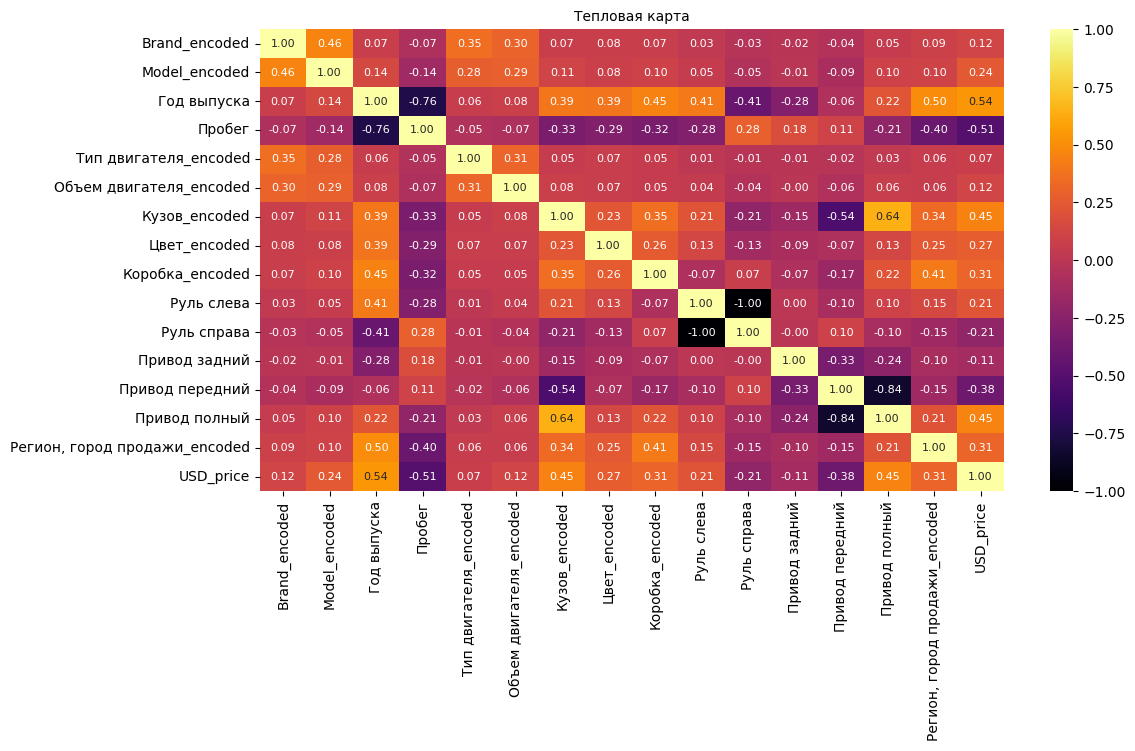

In [ ]:
encoded = ['Brand_encoded', 'Model_encoded', 'Год выпуска', 'Пробег', 'Тип двигателя_encoded', 'Объем двигателя_encoded', 'Кузов_encoded',
           'Цвет_encoded', 'Коробка_encoded', 'Руль слева', 'Руль справа', 'Привод задний', 'Привод передний', 'Привод полный',
           'Регион, город продажи_encoded', 'USD_price',]

encoded_corr = df[encoded].corr(numeric_only=True)
plt.figure(figsize=(12, 6))
sns.heatmap(encoded_corr, annot=True,fmt=".2f", cmap='inferno',annot_kws={"size": 8})
plt.title("Тепловая карта", fontsize=10)
plt.show()


Тепловая карта (Heatmap), построенная на основе данных о рынке автомобилей Кыргызстана, предоставляет визуальное представление о взаимосвязях между различными переменными. Цветовая шкала используется для отображения интенсивности взаимосвязи между парами переменных. Чем насыщеннее цвет, тем сильнее связь между соответствующими данными. Эта диаграмма позволяет выявить скрытые корреляции и обнаружить наиболее важные тренды на рынке автомобилей в Кыргызстане. Например, в данной матрице мы видим сильную отрицательную связь (-0.76) между пробегом и годом выпуска, это говорит о том, что чем старее автомобиль, тем больше становится пробег.

# Построение моделей для предсказания цен на автомобили

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944 entries, 0 to 5467
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Brand                          4944 non-null   object  
 1   Brand_encoded                  4944 non-null   float64 
 2   Model                          4944 non-null   object  
 3   Model_encoded                  4944 non-null   float64 
 4   Год выпуска                    4944 non-null   float64 
 5   Год выпуска_encoded            4944 non-null   float64 
 6   Пробег                         4944 non-null   float64 
 7   Пробег_encoded                 4944 non-null   float64 
 8   Тип двигателя                  4944 non-null   object  
 9   Тип двигателя_encoded          4944 non-null   float64 
 10  Объем двигателя                4944 non-null   object  
 11  Объем двигателя_encoded        4944 non-null   float64 
 12  Кузов                          494

In [ ]:
df.columns

Index(['Brand', 'Brand_encoded', 'Model', 'Model_encoded', 'Год выпуска',
       'Год выпуска_encoded', 'Пробег', 'Пробег_encoded', 'Тип двигателя',
       'Тип двигателя_encoded', 'Объем двигателя', 'Объем двигателя_encoded',
       'Кузов', 'Кузов_encoded', 'Цвет', 'Цвет_encoded', 'Коробка',
       'Коробка_encoded', 'Руль', 'Руль слева', 'Руль справа', 'Привод',
       'Привод задний', 'Привод передний', 'Привод полный',
       'Регион, город продажи', 'Регион, город продажи_encoded', 'USD_price',
       'KGS_price', 'Состояние', 'Состояние_encoded', 'Таможня', 'Наличие',
       'Price Category', 'Brand_New'],
      dtype='object')

*Теперь необходимо разделить данные на признаки (X) и целевую переменную (y)
для создания моделей. После этого следует выполнить разделение выборки на обучающую и тестовую части.*

In [ ]:
X = df[['Model_encoded', 'Год выпуска_encoded', 'Пробег_encoded', 'Тип двигателя_encoded', 'Кузов_encoded',
       'Цвет_encoded', 'Коробка_encoded', 'Привод передний', 'Привод задний', 'Состояние_encoded', 'Регион, город продажи_encoded']]
y = df['USD_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (3955, 11)
X_test:  (989, 11)
y_train:  (3955,)
y_test:  (989,)


***1. Линейная регрессия***

In [ ]:
lr_model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(lr_model, X, y, cv=kf, scoring='neg_mean_squared_error')

print('Mean RMSE-Score:', np.sqrt(-scores).mean())
print('Individual Fold RMSE-Scores:', np.sqrt(-scores))

Mean RMSE-Score: 17149.67087699992
Individual Fold RMSE-Scores: [21097.24960361 15373.48585823 15234.17486415 17131.46983957
 16911.97421945]


*Мы использовали модель линейной регрессии, но полученное значение RMSE (17149) говорит о том, что эта модель не дает хороших результатов. В связи с этим, планируется рассмотреть альтернативные модели для более точного предсказания цен на автомобили.*

***2. Random Forest Regressor***

In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 500),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'random_state': 42
    }

    rf_model = RandomForestRegressor(**params, verbose=False)

    scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return np.sqrt(-scores).mean()

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_rmse = study.best_value

best_rf_model = RandomForestRegressor(**best_params, verbose=False)
best_rf_model.fit(X_train, y_train)

[I 2023-08-15 08:03:21,252] A new study created in memory with name: no-name-fe73c505-cb4d-4c53-badf-6d52b52c05dd
[I 2023-08-15 08:03:29,156] Trial 0 finished with value: 14260.620269931978 and parameters: {'n_estimators': 414, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 12}. Best is trial 0 with value: 14260.620269931978.
[I 2023-08-15 08:03:32,593] Trial 1 finished with value: 16978.045059222706 and parameters: {'n_estimators': 303, 'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 19}. Best is trial 0 with value: 14260.620269931978.
[I 2023-08-15 08:03:36,351] Trial 2 finished with value: 12970.620257180482 and parameters: {'n_estimators': 137, 'max_depth': 8, 'min_samples_split': 17, 'min_samples_leaf': 1}. Best is trial 2 with value: 12970.620257180482.
[I 2023-08-15 08:03:43,817] Trial 3 finished with value: 12849.219226512056 and parameters: {'n_estimators': 235, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 3 with value

RandomForestRegressor(max_depth=10, min_samples_split=7, n_estimators=393,
                      verbose=False)

In [ ]:
print("Лучшие гиперпараметры:", best_params)
print("Лучший RMSE:", best_rmse)

Лучшие гиперпараметры: {'n_estimators': 393, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 1}
Лучший RMSE: 12689.227686139286


*Применение модели Random Forest Regressor показало значительное улучшение по сравнению с линейной регрессией. Полученное значение RMSE (12689) говорит о том, что данная модель дает более точные предсказания цен на автомобили. Это положительный шаг в направлении улучшения результатов.*

***3. Gradient Boosting Regressor***

In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log = True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'alpha': trial.suggest_float('alpha', 0.01, 0.5),
        'random_state': 42
    }

    gbr_model = GradientBoostingRegressor(**params, verbose=False)

    scores = cross_val_score(gbr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return np.sqrt(-scores).mean()

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_rmse = study.best_value

best_gbr_model = GradientBoostingRegressor(**best_params, verbose=False)
best_gbr_model.fit(X_train, y_train)

[I 2023-08-15 08:31:12,124] A new study created in memory with name: no-name-d974baa7-1db5-4975-9a80-4149dea69b48
[I 2023-08-15 08:31:19,958] Trial 0 finished with value: 12739.645444829255 and parameters: {'n_estimators': 212, 'learning_rate': 0.049142731261052765, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 2, 'subsample': 0.8165454680602118, 'alpha': 0.08094913107164824}. Best is trial 0 with value: 12739.645444829255.
[I 2023-08-15 08:31:23,058] Trial 1 finished with value: 19853.769101037837 and parameters: {'n_estimators': 112, 'learning_rate': 0.0023301691387891126, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 5, 'subsample': 0.6181500232693009, 'alpha': 0.08078271502534487}. Best is trial 0 with value: 12739.645444829255.
[I 2023-08-15 08:31:26,742] Trial 2 finished with value: 18151.87221071947 and parameters: {'n_estimators': 231, 'learning_rate': 0.002666503001181492, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 8, 'subsample': 0

GradientBoostingRegressor(alpha=0.4773693379801599,
                          learning_rate=0.015472419224983536, max_depth=6,
                          min_samples_leaf=2, min_samples_split=10,
                          n_estimators=309, subsample=0.8112428755293515,
                          verbose=False)

In [ ]:
print("Лучшие гиперпараметры:", best_params)
print("Лучший RMSE:", best_rmse)

Лучшие гиперпараметры: {'n_estimators': 309, 'learning_rate': 0.015472419224983536, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 2, 'subsample': 0.8112428755293515, 'alpha': 0.4773693379801599}
Лучший RMSE: 12291.176160809871


*Применение модели Gradient Boosting Regressor также привело к улучшению результатов. Полученное значение RMSE (12291) свидетельствует о дальнейшем повышении точности предсказаний цен на автомобили. Это подтверждает эффективность алгоритма градиентного бустинга для данной задачи.*

***4. CatBoost Regressor (Categorical Boosting)***

In [ ]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'random_strength': trial.suggest_int('random_strength', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.01, 10.0, log=True),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'random_state': 42
    }

    catbr_model = CatBoostRegressor(**params, verbose=False)

    scores = cross_val_score(catbr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return np.sqrt(-scores).mean()

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_rmse = study.best_value

best_catbr_model = CatBoostRegressor(**best_params, verbose=False)
best_catbr_model.fit(X_train, y_train)

[I 2023-08-15 08:45:32,625] A new study created in memory with name: no-name-ff555a4f-3794-48d3-9551-0be90a5699a3
[I 2023-08-15 08:45:44,373] Trial 0 finished with value: 12941.000059312373 and parameters: {'iterations': 449, 'depth': 8, 'learning_rate': 0.09618958985757207, 'random_strength': 4, 'bagging_temperature': 0.05884726670152902, 'border_count': 184}. Best is trial 0 with value: 12941.000059312373.
[I 2023-08-15 08:45:47,760] Trial 1 finished with value: 14294.962162478963 and parameters: {'iterations': 466, 'depth': 8, 'learning_rate': 0.006224107520640295, 'random_strength': 9, 'bagging_temperature': 1.0109508223030483, 'border_count': 61}. Best is trial 0 with value: 12941.000059312373.
[I 2023-08-15 08:45:49,770] Trial 2 finished with value: 12958.699341345324 and parameters: {'iterations': 673, 'depth': 4, 'learning_rate': 0.07481733991243199, 'random_strength': 8, 'bagging_temperature': 0.01705952986954101, 'border_count': 10}. Best is trial 0 with value: 12941.00005931

In [ ]:
print("Лучшие гиперпараметры:", best_params)
print("Лучший RMSE:", best_rmse)

Лучшие гиперпараметры: {'iterations': 400, 'depth': 7, 'learning_rate': 0.053383264447999366, 'random_strength': 1, 'bagging_temperature': 7.090183604162407, 'border_count': 255}
Лучший RMSE: 12430.029789687778


*Применение модели CatBoost Regressor показало значение RMSE (12430). Результат несколько хуже, чем у Gradient Boosting Regressor, CatBoost все равно предоставляет неплохую точность предсказаний цен на автомобили. Результаты CatBoost Regressor могут быть улучшены с дополнительной настройкой гиперпараметров или оптимизацией данных.*

***5. XGBoost Regressor (eXtreme Gradient Boosting)***

In [ ]:
def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'booster': 'gbtree',
        'nthread': -1,
        'verbosity': 0,

        'eta': trial.suggest_float('eta', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),

        'gamma': trial.suggest_float('gamma', 0.0, 1.0),
        'alpha': trial.suggest_float('alpha', 0.0, 1.0),
        'lambda': trial.suggest_float('lambda', 0.0, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 1.0, log=True),
        'random_state': 42
    }

    xgb_model = XGBRegressor(**params, verbose=False)

    scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return np.sqrt(-scores).mean()

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_rmse = study.best_value

best_xgb_model = XGBRegressor(**best_params, verbose=False)
best_xgb_model.fit(X_train, y_train)

[I 2023-08-15 09:00:00,469] A new study created in memory with name: no-name-5babaaf8-2a40-474f-a61a-ebb7be5be641
[I 2023-08-15 09:00:12,010] Trial 0 finished with value: 12545.918957524898 and parameters: {'eta': 0.13806669196176996, 'max_depth': 7, 'min_child_weight': 4, 'subsample': 0.586927907947373, 'colsample_bytree': 0.8870533368145878, 'gamma': 0.8845813352030367, 'alpha': 0.39894617201096916, 'lambda': 0.42916852336794475, 'n_estimators': 111, 'learning_rate': 0.03552978851439129}. Best is trial 0 with value: 12545.918957524898.
[I 2023-08-15 09:00:20,397] Trial 1 finished with value: 12683.163359069329 and parameters: {'eta': 0.030293222732320896, 'max_depth': 10, 'min_child_weight': 6, 'subsample': 0.7138723834347547, 'colsample_bytree': 0.8713936338434511, 'gamma': 0.16447869292429784, 'alpha': 0.14483303334956044, 'lambda': 0.20447502182495447, 'n_estimators': 273, 'learning_rate': 0.011847814646872165}. Best is trial 0 with value: 12545.918957524898.
[I 2023-08-15 09:00:2

[09:06:58] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.



XGBRegressor(alpha=0.5401132111231103, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9021719136832795, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1048895220553289, eval_metric=None,
             feature_types=None, gamma=0.8192457025952954, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=0.15710164589063436,
             learning_rate=0.021864714555736842, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=175, n_jobs=None, ...)

In [ ]:
print("Лучшие гиперпараметры:", best_params)
print("Лучший RMSE:", best_rmse)


Лучшие гиперпараметры: {'eta': 0.1048895220553289, 'max_depth': 6, 'min_child_weight': 2, 'subsample': 0.6516891320753728, 'colsample_bytree': 0.9021719136832795, 'gamma': 0.8192457025952954, 'alpha': 0.5401132111231103, 'lambda': 0.15710164589063436, 'n_estimators': 175, 'learning_rate': 0.021864714555736842}
Лучший RMSE: 12433.02957304961


*Применение модели XGBoost Regressor показало значение RMSE (12433). Это означает, что данная модель также дает предсказания цен на автомобили с определенной степенью точности. Опять же, подобно предыдущим моделям, результаты XGBoost Regressor также могут быть улучшены с помощью настройки гиперпараметров и дополнительной обработки данных.*

***6. MLPRegressor (Multi-Layer Perceptron)***

In [ ]:
def objective(trial):
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(50, 50), (100,)])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    solver = trial.suggest_categorical('solver', ['adam', 'sgd', 'lbfgs'])
    alpha = trial.suggest_loguniform('alpha', 0.0001, 0.01)
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'adaptive'])
    max_iter = trial.suggest_categorical('max_iter', [200, 500])
    random_state = trial.suggest_categorical('random_state', [42])

    mlp_model = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        alpha=alpha,
        learning_rate=learning_rate,
        max_iter=max_iter,
        random_state=random_state
    )

    scores = cross_val_score(mlp_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return np.sqrt(-scores).mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

[I 2023-08-15 10:12:04,924] A new study created in memory with name: no-name-57d9cca4-16c0-414e-a1c5-8552756968b4
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.

/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning:

Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.

<ipython-input-105-a0202afd1db1>:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2023-08-15 10:12:08,800] Trial 0 finished with value: 23581.100912341604 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 's

In [ ]:
print("Наилучшие гиперпараметры:", study.best_params)
print("Наилучшая оценка производительности:", study.best_value)

Наилучшие гиперпараметры: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.008296569798686815, 'learning_rate': 'constant', 'max_iter': 200, 'random_state': 42}
Наилучшая оценка производительности: 15476.286015807873


In [ ]:
best_mlp_model = MLPRegressor(hidden_layer_sizes=(100), activation= 'relu', solver='lbfgs', alpha=0.008296569798686815, learning_rate='constant', max_iter= 200, random_state= 42)
best_mlp_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



MLPRegressor(alpha=0.008296569798686815, hidden_layer_sizes=100,
             random_state=42, solver='lbfgs')

*Применение модели MLPRegressor показало значение RMSE (15476). Эта модель, основанная на многослойном перцептроне, дает предсказания средней точности для цен на автомобили в данной задаче.*

*В рамках нашего проекта мы реализовали создание шести различных моделей регрессии: Linear Regressor, Random Forest Regressor, Gradient Boosting Regressor, Cat Boost Regressor, XGBoost Regressor и MLP Regressor.*

*Для каждой из этих моделей мы провели настройку оптимальных гиперпараметров с помощью библиотеки Optuna. После завершения настройки гиперпараметров мы проанализировали производительность каждой модели, используя метод кросс-валидации.*

*Оценку качества каждой модели мы выполнили посредством использования метрики среднеквадратической ошибки (RMSE). Эта метрика позволяет оценить степень близости прогнозируемых значений модели к фактическим значениям. Минимальное значение RMSE свидетельствует о том, что модель делает предсказания с высокой точностью.*

*Продолжая дальнейший анализ, мы приступили к созданию ансамбля моделей с использованием метода "Stacking" или "Стэкинг". Этот метод предполагает объединение результатов отдельных моделей для достижения более точных и устойчивых прогнозов. Мы планируем оценить, какие улучшения принесет данная техника по сравнению с использованием моделей по отдельности.*

***7. Стекинг (Stacking)***

In [ ]:
stacking = StackingCVRegressor(regressors=[
                                            lr_model,
                                            best_rf_model,
                                            best_gbr_model,
                                            best_xgb_model,
                                            best_catbr_model,
                                            best_mlp_model
                                            ],
                                meta_regressor=best_catbr_model,
                                use_features_in_secondary=True)
stacking.fit(X_train, y_train)

[10:24:12] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[10:24:13] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[10:24:14] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[10:24:14] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[10:24:15] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepro

[10:24:36] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



StackingCVRegressor(meta_regressor=<catboost.core.CatBoostRegressor object at 0x7e38b7a75090>,
                    regressors=[LinearRegression(),
                                RandomForestRegressor(max_depth=10,
                                                      min_samples_split=7,
                                                      n_estimators=393,
                                                      verbose=False),
                                GradientBoostingRegressor(alpha=0.4773693379801599,
                                                          learning_rate=0.015472419224983536,
                                                          max_depth=6,
                                                          min_samples_leaf=2,
                                                          min_samples_split=10,
                                                          n_e...
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None, max_depth=6,
                                             max_leaves=None,
                                             min_child_weight=2, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=175, n_jobs=None, ...),
                                <catboost.core.CatBoostRegressor object at 0x7e38b7a75090>,
                                MLPRegressor(alpha=0.008296569798686815,
                                             hidden_layer_sizes=100,
                                             random_state=42, solver='lbfgs')],
                    use_features_in_secondary=True)

In [ ]:
y_pred_stack = stacking.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but GradientBoostingRegressor was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but MLPRegressor was fitted without feature names



In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_stack))

print('RMSE, Root Mean Squared Error:', rmse)

RMSE, Root Mean Squared Error: 15750.0825955396


*Модель стекинга показала значение RMSE (15750). Стекинг, или ансамблирование моделей, представляет собой подход, при котором различные модели объединяются для улучшения предсказательной способности. В данном случае, результат модели стекинга пока несколько хуже предыдущих моделей. Возможно, можно провести дополнительную оптимизацию вариантов моделей и их взаимодействия для достижения более точных предсказаний.*

#Построение моделей (OneHot Encoding)

*Для более детального анализа проекта и оценки работы моделей мы решили применить метод кодирования OneHot Encoding ко всем столбцам, передаваемым в переменную X. Это позволит убедиться в том, что для кодирования данных можно использовать как метод Target Encoding, так и метод OneHot Encoding, без беспокойства о том, какой из них будет более эффективным для работы с моделями.*

In [ ]:
df.columns

Index(['Brand', 'Brand_encoded', 'Model', 'Model_encoded', 'Год выпуска',
       'Год выпуска_encoded', 'Пробег', 'Пробег_encoded', 'Тип двигателя',
       'Тип двигателя_encoded', 'Объем двигателя', 'Объем двигателя_encoded',
       'Кузов', 'Кузов_encoded', 'Цвет', 'Цвет_encoded', 'Коробка',
       'Коробка_encoded', 'Руль', 'Руль слева', 'Руль справа', 'Привод',
       'Привод задний', 'Привод передний', 'Привод полный',
       'Регион, город продажи', 'Регион, город продажи_encoded', 'USD_price',
       'KGS_price', 'Состояние', 'Состояние_encoded', 'Таможня', 'Наличие',
       'Price Category', 'Brand_New'],
      dtype='object')

In [ ]:
df = df[['Brand', 'Model', 'Год выпуска', 'Пробег', 'Тип двигателя', 'Объем двигателя', 'Кузов', 'Цвет', 'Коробка',
                        'Руль', 'Привод', 'Регион, город продажи', 'Состояние', 'USD_price']]

In [ ]:
columns_to_encode = ['Год выпуска', 'Пробег', 'Кузов', 'Цвет', 'Тип двигателя', 'Коробка',
                     'Привод', 'Состояние', 'Регион, город продажи', 'Model']

df_dummies = pd.get_dummies(df, columns=columns_to_encode)
df_dummies.columns

Index(['Brand', 'Объем двигателя', 'Руль', 'USD_price', 'Год выпуска_1990.0',
       'Год выпуска_1991.0', 'Год выпуска_1992.0', 'Год выпуска_1993.0',
       'Год выпуска_1994.0', 'Год выпуска_1995.0',
       ...
       'Model_bB', 'Model_bZ4X', 'Model_e2', 'Model_e:NP1', 'Model_e:NS1',
       'Model_i', 'Model_i4', 'Model_i40', 'Model_iX', 'Model_xA'],
      dtype='object', length=2372)

In [ ]:
X = df_dummies.iloc[0:, 4:]
y = df_dummies['USD_price']
X.head()

,Год выпуска_1990.0,Год выпуска_1991.0,Год выпуска_1992.0,Год выпуска_1993.0,Год выпуска_1994.0,Год выпуска_1995.0,Год выпуска_1996.0,Год выпуска_1997.0,Год выпуска_1998.0,Год выпуска_1999.0,...,Model_bB,Model_bZ4X,Model_e2,Model_e:NP1,Model_e:NS1,Model_i,Model_i4,Model_i40,Model_iX,Model_xA
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
lr_model = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=42)
lr_scores = cross_val_score(lr_model, X, y, cv=kf, scoring='neg_mean_squared_error')

print('Root Mean Squared Error:', np.sqrt(-lr_scores).mean())
print('Individual Fold RMSE-Scores:', np.sqrt(-lr_scores))

Root Mean Squared Error: 1.848917551518553e+16
Individual Fold RMSE-Scores: [1.66369663e+16 5.71947220e+15 1.25588855e+16 1.33291938e+16
 5.23514024e+16 2.63442957e+16 1.63566849e+16 5.22087330e+15
 5.01826796e+15 3.13557131e+16]


*После применения метода кодирования OneHot Encoding к колонкам и создания модели линейной регрессии, мы получили значение равное 1.848917551518553e+16. Данный результат значительно отличается от ожидаемого и указывает на наличие проблем в модели или данных.*

In [ ]:
rf_model = RandomForestRegressor(n_estimators = 295, max_depth = 9, min_samples_split = 4, min_samples_leaf = 2, random_state = 42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='neg_mean_squared_error')

print('Root Mean Squared Error:', np.sqrt(-rf_scores).mean())
print('Individual Fold RMSE-Scores:', np.sqrt(-rf_scores))

Root Mean Squared Error: 16631.04234714397
Individual Fold RMSE-Scores: [21112.24206379 21013.35288141 13320.37829535 15964.3988328
 14196.96005685 15044.06024632 17585.28522532 15811.17046323
 17136.75069341 15125.82471297]


*После применения метода кодирования OneHot Encoding к колонкам и построения модели случайного леса (Random Forest Regressor), мы получили значение равное 16631. Этот результат выглядит более интерпретируемым и показывает лучшую производительность по сравнению с предыдущей моделью линейной регрессии.*

*После применения метода кодирования OneHot Encoding ко всем колонкам, переданным в виде переменной X, и создания моделей для сравнения, мы наблюдаем ухудшение результатов. Это может быть связано с тем, что OneHot Encoding приводит к большому числу новых признаков, что может привести к переобучению модели или увеличению размерности данных. В таком случае, стоит рассмотреть альтернативные методы кодирования и подбор гиперпараметров модели для улучшения её производительности.*

# Анализ после проделанной работы по проекту:

*В ходе данного проекта был выполнен широкий спектр этапов для прогнозирования цен на автомобили, включая использование разнообразных моделей и методов. Значительное внимание уделено начальной очистке и обработке данных, что позволило успешно перейти к визуализации и созданию моделей.*

*Для прогнозирования цен с применением регрессионных моделей были рассмотрены семь различных вариантов: Линейная регрессия (Linear Regressor), Случайный лес (Random Forest Regressor), Градиентный бустинг (GradientBoosting Regressor), CatBoost регрессия (CatBoost Regressor), XGBoost регрессия (XGBoost Regressor), Многослойный перцептрон (MLP Regressor) и ансамбль моделей с использованием метода стекинга (StackingCVRegressor).*

*Для оценки качества моделей выбрана метрика среднеквадратической ошибки (RMSE). Модели линейной регрессии и стекинга показали наихудшие результаты в сравнении с другими, в то время как градиентный бустинг продемонстрировал наилучшие показатели. Следует подчеркнуть, что разница в производительности между градиентным бустингом и другими методами бустинга оказалась незначительной. Для более точных прогнозов цен необходимы более качественные и точные данные.*